<a href="https://colab.research.google.com/github/UNCG-CSE/COVID-Team-2/blob/master/src/raiana/Project_Stage_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Using to mount google drive as i am using google colab for this assignment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

import datetime as datetime

#Fuction from group task

In [3]:
def get_confirmed_deaths_tuple_df(super_covid_df):

    #calculate need cols and dates for confirmed df
    confirmed_cases_cols = ["countyFIPS", "County Name", "State", "stateFIPS" ] + [col for col in super_covid_df.columns if col.startswith("confirmed_")]
    
    #Get new dataframe from team file with needed cols
    confirmed_cases = super_covid_df[confirmed_cases_cols].copy()

    #rename date cols to remove confirmed title
    confirmed_cases.columns = [col.replace("confirmed_","") if col.startswith("confirmed_") else col for col in confirmed_cases.columns]

    #calculate need cols and dates for deaths df
    deaths_cols = ["countyFIPS", "County Name", "State", "stateFIPS" ] + [col for col in super_covid_df.columns if col.startswith("deaths_")]

    #Get new dataframe from team file with needed cols
    deaths = super_covid_df[deaths_cols].copy()

    #rename date cols to remove deaths title
    deaths.columns = [col.replace("deaths_","") if col.startswith("deaths_") else col for col in deaths.columns]

    return confirmed_cases, deaths

#Part-1

#1.Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a NY state.

In [13]:
#read world csv file
USA_covid_data = pd.read_csv("/content/drive/My Drive/Datascience/COVID-Team-2/data/superCOVID-19datafame.csv")

print(USA_covid_data.head())

   countyFIPS            County Name  ... deaths_9/20/20  deaths_9/21/20
0           0  Statewide Unallocated  ...              0               0
1        1001         Autauga County  ...             24              24
2        1003         Baldwin County  ...             49              49
3        1005         Barbour County  ...              7               7
4        1007            Bibb County  ...             10              10

[5 rows x 493 columns]


In [14]:

confirmed_cases_USA, deaths_USA = get_confirmed_deaths_tuple_df (USA_covid_data)

options = ["NY"] 
#total conformed  number in NY
confirmed_cases_Selected = confirmed_cases_USA[confirmed_cases_USA ['State'].isin(options)] 
NY_confirmed = confirmed_cases_Selected.drop(['countyFIPS','stateFIPS'],1)
print(NY_confirmed.head())


                County Name State  1/22/20  ...  9/19/20  9/20/20  9/21/20
1858  Statewide Unallocated    NY        0  ...       69       69       69
1859          Albany County    NY        0  ...     3006     3016     3024
1860        Allegany County    NY        0  ...       96       98       99
1861           Bronx County    NY        0  ...    52526    52578    52619
1862          Broome County    NY        0  ...     1459     1465     1472

[5 rows x 246 columns]


In [15]:

#total death number in NY
deaths_Selected= deaths_USA [deaths_USA ['State'].isin(options)]
NY_death = deaths_Selected.drop(['countyFIPS','stateFIPS'],1)
print(NY_death.head())

                County Name State  1/22/20  ...  9/19/20  9/20/20  9/21/20
1858  Statewide Unallocated    NY        0  ...      106      106      106
1859          Albany County    NY        0  ...      123      123      123
1860        Allegany County    NY        0  ...        2        2        2
1861           Bronx County    NY        0  ...     4939     4941     4942
1862          Broome County    NY        0  ...       85       85       85

[5 rows x 246 columns]


In [16]:
# calculate each week's new cases
def weekly_cases(df):
  daily_cases = df.drop(df.columns[[0, 1, 2, 3]], 1)
  daily_difference = daily_cases.diff(axis=1)
  daily_difference = daily_difference.drop(daily_difference.columns[0], 1) # drop the first column
  result = pd.DataFrame()
  previous_week = -1
  for date in daily_difference.columns:
    current_week = pd.to_datetime(date).week
    if current_week != previous_week:
      previous_week = current_week
      result[date] = daily_difference[date]
    else:
      result.loc[:-1] += daily_difference[date]
  result['State'] = df['State']
  return result.groupby('State').sum() # merge each couties's cases to the corresponding state

weekly_confirmed = weekly_cases(NY_confirmed)

weekly_death = weekly_cases(NY_death)

# generate table
def output_table(title, df):
  # calculate stats
  states_mean = df.mean(axis=1)
  states_median = df.median(axis=1)
  states_mode = df.mode(axis=1)

  # format table and print
  print(title)
  print('==============================')
  print('{:^6} {:^6} | {:^6} | {:^6}'.format('', 'Mean', 'Median', 'Mode'))
  for state in df.index:
    mean = int(states_mean.loc[state])
    median = int(states_median.loc[state])
    mode = int(states_mode.loc[state].values[0])
    print('{:^6} {:^6} | {:^6} | {:^6}'.format(state, mean, median, mode))
output_table('Weekly Confirmed', weekly_confirmed)
output_table('Weekly Death', weekly_death)

Weekly Confirmed
        Mean  | Median |  Mode 
  NY    1479  |  565   |   0   
Weekly Death
        Mean  | Median |  Mode 
  NY    103   |   11   |   0   


#Compare the data against other states.

**Choosing 5 state to campare which has similar population**

In [17]:
#total population of 
New_USA_covid_data= USA_covid_data.groupby( USA_covid_data['State']).sum()

#sort data by population deascending
New_USA_covid_data=New_USA_covid_data.sort_values(by='population', ascending=False)
New_USA_covid_data=New_USA_covid_data.drop(['countyFIPS','stateFIPS'],1)

print(New_USA_covid_data.head(10))

       population  confirmed_1/22/20  ...  deaths_9/20/20  deaths_9/21/20
State                                 ...                                
CA       39512223                  0  ...           15018           15069
TX       28995881                  0  ...           14888           14912
FL       21477737                  0  ...           13296           13317
NY       19453561                  0  ...           32776           32778
PA       12801989                  0  ...            7980            8004
IL       12671821                  0  ...            8450            8457
OH       11689100                  0  ...            4615            4623
GA       10617423                  0  ...            6602            6604
NC       10488084                  0  ...            3243            3247
MI        9986857                  0  ...            6969            6981

[10 rows x 489 columns]


**Selecting data of PA, IL,OH,GA ,NC**

In [18]:
confirmed_cases_USA, deaths_USA = get_confirmed_deaths_tuple_df (USA_covid_data)
options = ['NC',"PA","IL","OH","GA","NY"] 

#total conformed  number 
confirmed_cases_Selected = confirmed_cases_USA[confirmed_cases_USA ['State'].isin(options)] 
Selected_confirmed = confirmed_cases_Selected.drop(['countyFIPS','stateFIPS'],1)
print(Selected_confirmed.head())


#total death number 
deaths_Selected= deaths_USA [deaths_USA ['State'].isin(options)]
Selected_death = deaths_Selected.drop(['countyFIPS','stateFIPS'],1)
print(Selected_death.head())



               County Name State  1/22/20  ...  9/19/20  9/20/20  9/21/20
397  Statewide Unallocated    GA        0  ...    19361    19445    19750
398         Appling County    GA        0  ...     1001     1007     1010
399        Atkinson County    GA        0  ...      435      435      435
400           Bacon County    GA        0  ...      589      592      592
401           Baker County    GA        0  ...       78       78       78

[5 rows x 246 columns]
               County Name State  1/22/20  ...  9/19/20  9/20/20  9/21/20
397  Statewide Unallocated    GA        0  ...      154      154      154
398         Appling County    GA        0  ...       26       26       26
399        Atkinson County    GA        0  ...        3        3        3
400           Bacon County    GA        0  ...       10       10       10
401           Baker County    GA        0  ...        3        3        3

[5 rows x 246 columns]


In [19]:
weekly_confirmed = weekly_cases(Selected_confirmed)

weekly_death = weekly_cases(Selected_death)

# generate table
def output_table(title, df):
  # calculate stats
  states_mean = df.mean(axis=1)
  states_median = df.median(axis=1)
  states_mode = df.mode(axis=1)

  # format table and print
  print(title)
  print('==============================')
  print('{:^6} {:^6} | {:^6} | {:^6}'.format('', 'Mean', 'Median', 'Mode'))
  for state in df.index:
    mean = int(states_mean.loc[state])
    median = int(states_median.loc[state])
    mode = int(states_mode.loc[state].values[0])
    print('{:^6} {:^6} | {:^6} | {:^6}'.format(state, mean, median, mode))
output_table('Weekly Confirmed', weekly_confirmed)
output_table('Weekly Death', weekly_death)

Weekly Confirmed
        Mean  | Median |  Mode 
  GA    990   |  822   |   0   
  IL    909   |  990   |   0   
  NC    617   |  536   |   0   
  NY    1479  |  565   |   0   
  OH    538   |  543   |   0   
  PA    482   |  474   |   0   
Weekly Death
        Mean  | Median |  Mode 
  GA     23   |   17   |   0   
  IL     14   |   7    |   0   
  NC     4    |   3    |   0   
  NY    103   |   11   |   0   
  OH     12   |   8    |   0   
  PA     18   |   3    |   0   


#3.Identify counties in  NY state with high case and death rates

In [20]:
#read file for NYC  from state 1
NYC_df =  pd.read_csv("/content/drive/My Drive/Datascience/COVID-Team-2/src/raiana/raiana.nyc.csv")

confirmed_cases_NY, deaths_NY = get_confirmed_deaths_tuple_df(NYC_df)

print(confirmed_cases_NY.head())
print(deaths_NY.head())

   countyFIPS            County Name State  ...  9/17/20  9/18/20  9/19/20
0           0  Statewide Unallocated    NY  ...       69       69       69
1       36001          Albany County    NY  ...     2969     2979     3006
2       36003        Allegany County    NY  ...       94       95       96
3       36005           Bronx County    NY  ...    52422    52468    52526
4       36007          Broome County    NY  ...     1437     1450     1459

[5 rows x 246 columns]
   countyFIPS            County Name State  ...  9/17/20  9/18/20  9/19/20
0           0  Statewide Unallocated    NY  ...      106      106      106
1       36001          Albany County    NY  ...      123      123      123
2       36003        Allegany County    NY  ...        2        2        2
3       36005           Bronx County    NY  ...     4934     4934     4939
4       36007          Broome County    NY  ...       85       85       85

[5 rows x 246 columns]


In [21]:

NYC_county_population = NYC_df[['County Name', 'population']]
NYC_county_population

,County Name,population
0,Statewide Unallocated,0
1,Albany County,305506
2,Allegany County,46091
3,Bronx County,1418207
4,Broome County,190488
...,...,...
58,Washington County,61204
59,Wayne County,89918
60,Westchester County,967506
61,Wyoming County,39859


In [28]:

# Top cases counties
county_confirmed_cases = confirmed_cases_NY.merge(NYC_county_population, on='County Name')
county_confirmed_cases['normalized_total'] = (1000 * county_confirmed_cases[county_confirmed_cases.columns[-2]]) / county_confirmed_cases['population']  # normalization
county_confirmed_cases = county_confirmed_cases.replace([np.inf, -np.inf], np.nan).dropna()

# get top 5 counties
highest_confirmed_counties = county_confirmed_cases['normalized_total'].sort_values(ascending=False).head() 
highest_confirmed_counties = county_confirmed_cases.loc[highest_confirmed_counties.index,:]
print(highest_confirmed_counties.round())


# deaths
county_deaths = deaths_NY.merge(NYC_county_population, on='County Name')
county_deaths['normalized_total'] =  (10000 * county_deaths[deaths_NY.columns[-1]]) / county_deaths['population'] # normalization

county_deaths = county_deaths.replace([np.inf, -np.inf], np.nan).dropna()
highest_death_counties = county_deaths['normalized_total'].sort_values(ascending=False).head()
highest_death_counties = county_deaths.loc[highest_death_counties.index,:]
print(highest_death_counties.round())

    countyFIPS         County Name State  ...  9/19/20  population  normalized_total
44       36087     Rockland County    NY  ...    14801      325789              45.0
60       36119  Westchester County    NY  ...    37755      967506              39.0
3        36005        Bronx County    NY  ...    52526     1418207              37.0
30       36059       Nassau County    NY  ...    46154     1356924              34.0
43       36085     Richmond County    NY  ...    15713      476143              33.0

[5 rows x 248 columns]
    countyFIPS      County Name State  ...  9/19/20  population  normalized_total
3        36005     Bronx County    NY  ...     4939     1418207              35.0
41       36081    Queens County    NY  ...     7243     2253858              32.0
24       36047     Kings County    NY  ...     7315     2559903              29.0
43       36085  Richmond County    NY  ...     1085      476143              23.0
31       36061  New York County    NY  ...     3173     

#Plot daily trends (cases and deaths, new cases) of state and top 5 infected counties

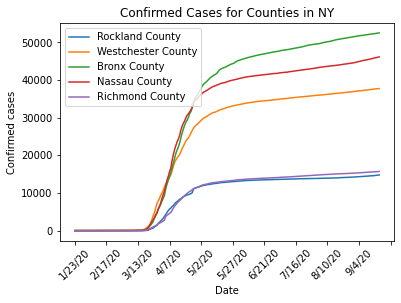

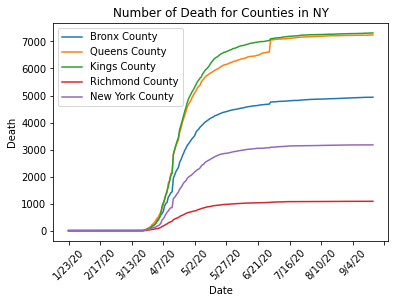

In [29]:
fig, ax = plt.subplots()
for i, county in enumerate(highest_confirmed_counties['County Name'].unique()):
  plt.plot(highest_confirmed_counties.columns[5:-1], highest_confirmed_counties.iloc[i,4:-2], label=county)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.xticks(rotation=45)
plt.title('Confirmed Cases for Counties in NY')
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

fig, ax = plt.subplots()
for i, county in enumerate(highest_death_counties['County Name'].unique()):
  plt.plot(highest_death_counties.columns[5:-1], highest_death_counties.iloc[i,4:-2], label=county)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Death')
plt.xticks(rotation=45)
plt.title('Number of Death for Counties in NY')
ax.xaxis.set_major_locator(plt.MaxNLocator(12))